In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import numpy as np

def softmax(z):
    """
    Compute the softmax probabilities for a given input matrix.

    Parameters:
    z (numpy.ndarray): Logits (raw scores) of shape (m, n), where
        - m is the number of samples.
        - n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probability matrix of shape (m, n), where
        each row sums to 1 and represents the probability
        distribution over classes.

    Notes:
    - The input to softmax is typically computed as: z = XW + b.
    - Uses numerical stabilization by subtracting the max value per row.
    """
    # Numerical stabilization: subtract the max value in each row
    z_stable = z - np.max(z, axis=1, keepdims=True)

    # Compute the exponentials
    exp_z = np.exp(z_stable)

    # Compute the softmax probabilities
    softmax_probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    return softmax_probs

In [12]:
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)
# Verify if the sum of probabilities for each row is 1 using assert
row_sums = np.sum(softmax_output, axis=1)
# Assert that the sum of each row is 1
assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"
print("Softmax function passed the test case!")

Softmax function passed the test case!


In [16]:
import numpy as np

def predict_softmax(X, W, b):
    """
    Predict the class labels for a set of samples using the trained softmax model.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the
        number of features.
    W (numpy.ndarray): Weight matrix of shape (d, c), where c is the number of classes.
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,), where each value is the index of the
        predicted class.
    """
    # Compute the logits (raw scores): XW + b
    z = np.dot(X, W) + b

    # Compute the softmax probabilities
    y_pred = softmax(z)

    # Predict the class with the highest probability for each sample
    predicted_classes = np.argmax(y_pred, axis=1)

    return predicted_classes

In [30]:
def loss_softmax(y_pred, y):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)
    return -np.sum(y * np.log(y_pred))

In [31]:
def cost_softmax(X, y, W, b):
    """
    Compute the average softmax regression cost (cross-entropy loss) over all samples.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the
    number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where n is the number of
    samples and c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    Returns:
    float: Average softmax cost (cross-entropy loss) over all samples.
    """
    n = X.shape[0]
    z = X @ W + b
    y_pred = softmax(z)
    total_loss = np.sum(loss_softmax(y_pred, y))
    # Return average loss
    return total_loss / n



In [34]:
# The test case assures that the cost for the incorrect prediction should be higher than for thecorrect prediction, confirming that the cost function behaves as expected.
import numpy as np
# Example 1: Correct Prediction (Closer predictions)
X_correct = np.array([[1.0, 0.0], [0.0, 1.0]]) # Feature matrix for correct predictions
y_correct = np.array([[1, 0], [0, 1]]) # True labels (one-hot encoded, matching predictions)
W_correct = np.array([[5.0, -2.0], [-3.0, 5.0]]) # Weights for correct prediction
b_correct = np.array([0.1, 0.1]) # Bias for correct prediction
# Example 2: Incorrect Prediction (Far off predictions)
X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]]) # Feature matrix for incorrect predictions
y_incorrect = np.array([[1, 0], [0, 1]]) # True labels (one-hot encoded, incorrect predictions)
W_incorrect = np.array([[0.1, 2.0], [1.5, 0.3]]) # Weights for incorrect prediction
b_incorrect = np.array([0.5, 0.6]) # Bias for incorrect prediction
# Compute cost for correct predictions
cost_correct = cost_softmax(X_correct, y_correct, W_correct, b_correct)
# Compute cost for incorrect predictions
cost_incorrect = cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)
# Check if the cost for incorrect predictions is greater than for correct predictions
assert cost_incorrect > cost_correct, f"Test failed: Incorrect cost {cost_incorrect} is not greater than correct cost {cost_correct}"
# Print the costs for verification
print("Cost for correct prediction:", cost_correct)
print("Cost for incorrect prediction:", cost_incorrect)
print("Test passed!")

Cost for correct prediction: 0.0006234364133349324
Cost for incorrect prediction: 0.29930861359446115
Test passed!


In [41]:
def compute_gradient_softmax(X, y, W, b):

# Compute the gradients of the cost function with respect to weights and biases.
# Parameters:
# X (numpy.ndarray): Feature matrix of shape (n, d).
# y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
# W (numpy.ndarray): Weight matrix of shape (d, c).
# b (numpy.ndarray): Bias vector of shape (c,).
# Returns:
# tuple: Gradients with respect to weights (d, c) and biases (c,).
# """
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W = -np.dot(X.T, (y - y_pred)) / X.shape[0]
    grad_b = -np.sum(y - y_pred, axis=0) / X.shape[0]
    return grad_W, grad_b

In [40]:
import numpy as np
# Define a simple feature matrix and true labels
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]]) # Feature matrix (3 samples, 2 features)
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) # True labels (one-hot encoded, 3 classes)
# Define weight matrix and bias vector
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]]) # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3]) # Bias (3 classes)
# Compute the gradients using the function
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)
# Manually compute the predicted probabilities (using softmax function)
z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)
# Compute the manually computed gradients
grad_W_manual = np.dot(X_test.T, (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]
# Assert that the gradients computed by the function match the manually computed gradients
assert np.allclose(grad_W, grad_W_manual), f"Test failed: Gradients w.r.t. W are not equal.\
nExpected: {grad_W_manual}\nGot: {grad_W}"
assert np.allclose(grad_b, grad_b_manual), f"Test failed: Gradients w.r.t. b are not equal.\
nExpected: {grad_b_manual}\nGot: {grad_b}"
# Print the gradients for verification
print("Gradient w.r.t. W:", grad_W)
print("Gradient w.r.t. b:", grad_b)
print("Test passed!")

Gradient w.r.t. W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. b: [-0.03290036  0.02484708  0.00805328]
Test passed!


In [42]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        if show_cost:
            cost = loss_softmax(softmax(np.dot(X, W) + b), y)
            cost_history.append(cost)
    return W, b, cost_history

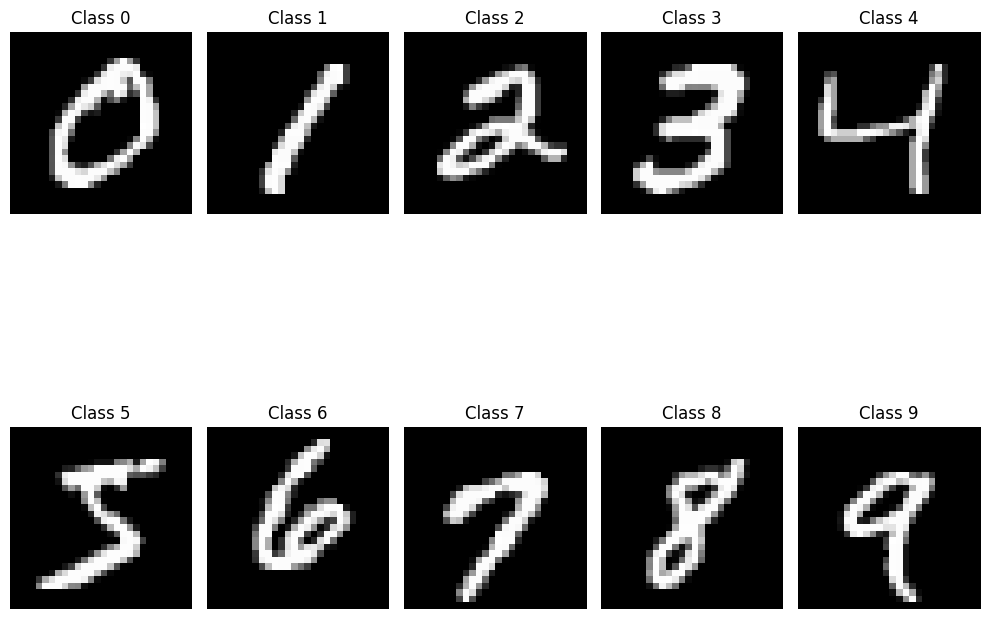

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    """
    Reads the MNIST CSV file, splits data into train/test sets, and plots one image per class.
    Arguments:
    csv_file (str) : Path to the CSV file containing MNIST data.
    test_size (float) : Proportion of the data to use as the test set (default: 0.2).
    random_state (int) : Random seed for reproducibility (default: 42).
    Returns:
    X_train, X_test, y_train, y_test : Split dataset.
    """
    df = pd.read_csv(csv_file)
    y = df.iloc[:, 0].values
    X = df.iloc[:, 1:].values
    X = X / 255.0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    plot_sample_images(X, y)
    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    plt.figure(figsize=(10, 10))
    for digit in range(10):
        index = np.where(y == digit)[0][0]
        image = X[index].reshape(28, 28)
        plt.subplot(2, 5, digit + 1)
        plt.imshow(image, cmap="gray")
        plt.title(f"Class {digit}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

file_path = "/content/drive/MyDrive/data/mnist_dataset.csv"
X_train, X_test, y_train, y_test = load_and_prepare_mnist(file_path)

Iteration 0: Cost = 2.3127931292392994
Iteration 100: Cost = 0.608626397500416
Iteration 200: Cost = 0.4896871496456994
Iteration 300: Cost = 0.4408582623389972
Iteration 400: Cost = 0.4127153613845127
Iteration 500: Cost = 0.39382907991231486
Iteration 600: Cost = 0.38000482224085924
Iteration 700: Cost = 0.36930176508942386
Iteration 800: Cost = 0.3606840807402923
Iteration 900: Cost = 0.3535422358521125


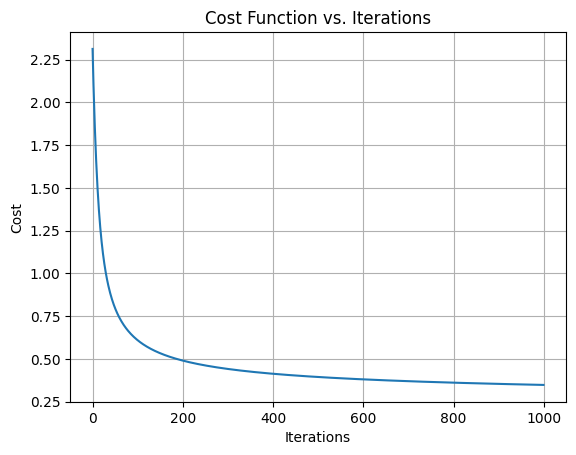

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Check if y_train is one-hot encoded
if len(y_train.shape) == 1:
    encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False for newer versions of sklearn
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))  # One-hot encode labels
    y_test = encoder.transform(y_test.reshape(-1, 1))  # One-hot encode test labels

# Now y_train is one-hot encoded, and we can proceed to use it
d = X_train.shape[1]  # Number of features (columns in X_train)
c = y_train.shape[1]  # Number of classes (columns in y_train after one-hot encoding)

# Initialize weights with small random values and biases with zeros
W = np.random.randn(d, c) * 0.01  # Small random weights initialized
b = np.zeros(c)  # Bias initialized to 0

# Set hyperparameters for gradient descent
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations to run gradient descent

# Define the softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define the gradient descent function for softmax regression
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    m = X.shape[0]  # Number of training examples
    cost_history = []

    for i in range(n_iter):
        # Forward pass: Compute predictions
        Z = np.dot(X, W) + b
        A = softmax(Z)

        # Compute the cost (cross-entropy loss)
        cost = -np.mean(np.sum(y * np.log(A + 1e-8), axis=1))  # Add a small value to avoid log(0)
        cost_history.append(cost)

        # Backward pass: Compute gradients
        dZ = A - y
        dW = np.dot(X.T, dZ) / m
        db = np.sum(dZ, axis=0) / m

        # Update parameters
        W -= alpha * dW
        b -= alpha * db

        # Optionally print the cost
        if show_cost and i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return W, b, cost_history

# Train the model using gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot the cost history to visualize the convergence
plt.plot(cost_history)
plt.title("Cost Function vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()